- [rugplot description](#rugplot)
- [histogram description](#hist)
- [KDE (Kernel Density Estimation) description](#kde)
- [sns.rugplot()](#snsrugplot)
    - sns.rugplot(x='', data=)
    - sns.rugplot(x='', data=, height=)
    - sns.rugplot(x='', data=, height=, linewidth=)
- [sns.displot()](#snsdisplot)
    - sns.displot(data=, x='')
    - sns.displot(data=, x='', bins=)
    - sns.displot(data=, x='', bins=, color='', edgecolor='', linewidth=, ls='')
    - sns.displot(data=, x='', kde=True)
    - sns.displot(data=, x='', rug=True)
- [sns.histplot(data=, x='')](#snshistplot)
- [sns.kdeplot()](#snskdeplot)
    - sns.kdeplot(data=, x='')
    - sns.kdeplot(data=, x='', clip=[])
    - sns.kdeplot(data=, x='', bw_adjust=)
    - sns.kdeplot(data=, x='', shade=True)
- [sns.set(style='')](#styles)
    - sns.set(style='darkgrid')
    - sns.set(style='whitegrid')
    - sns.set(style='white')
    - sns.set(style='dark')
    - sns.set(style='ticks')

___

- Distribution plots display a single continuous feature and help visualize properties such as deviation and average values.
- There are 3 main distribution plot types:
    - __Rug Plot__
    - __Histogram__
    - __KDE Plot__ (Kernel Density Estimation)

___

<a id='rugplot'></a>

__`rug plot`__

A __rug plot__ is the simplest distribution plot and it merely adds a single dash or tick line for every single value. So the y axis doesn't actually really have a meaning for a rug plot.

What is nice about the rug plot is I immediately can see outliers. So if I wanted to know the highest or the lowest values of the feature, I can see those single ticks quite clearly.

However, many ticks could be right on top of each other, we can't tell it.

___

<a id='hist'></a>

__`histogram`__

If we __count__ how many ticks there are per various x-ranges, we can create a __histogram__.

In [1]:
from PIL import Image

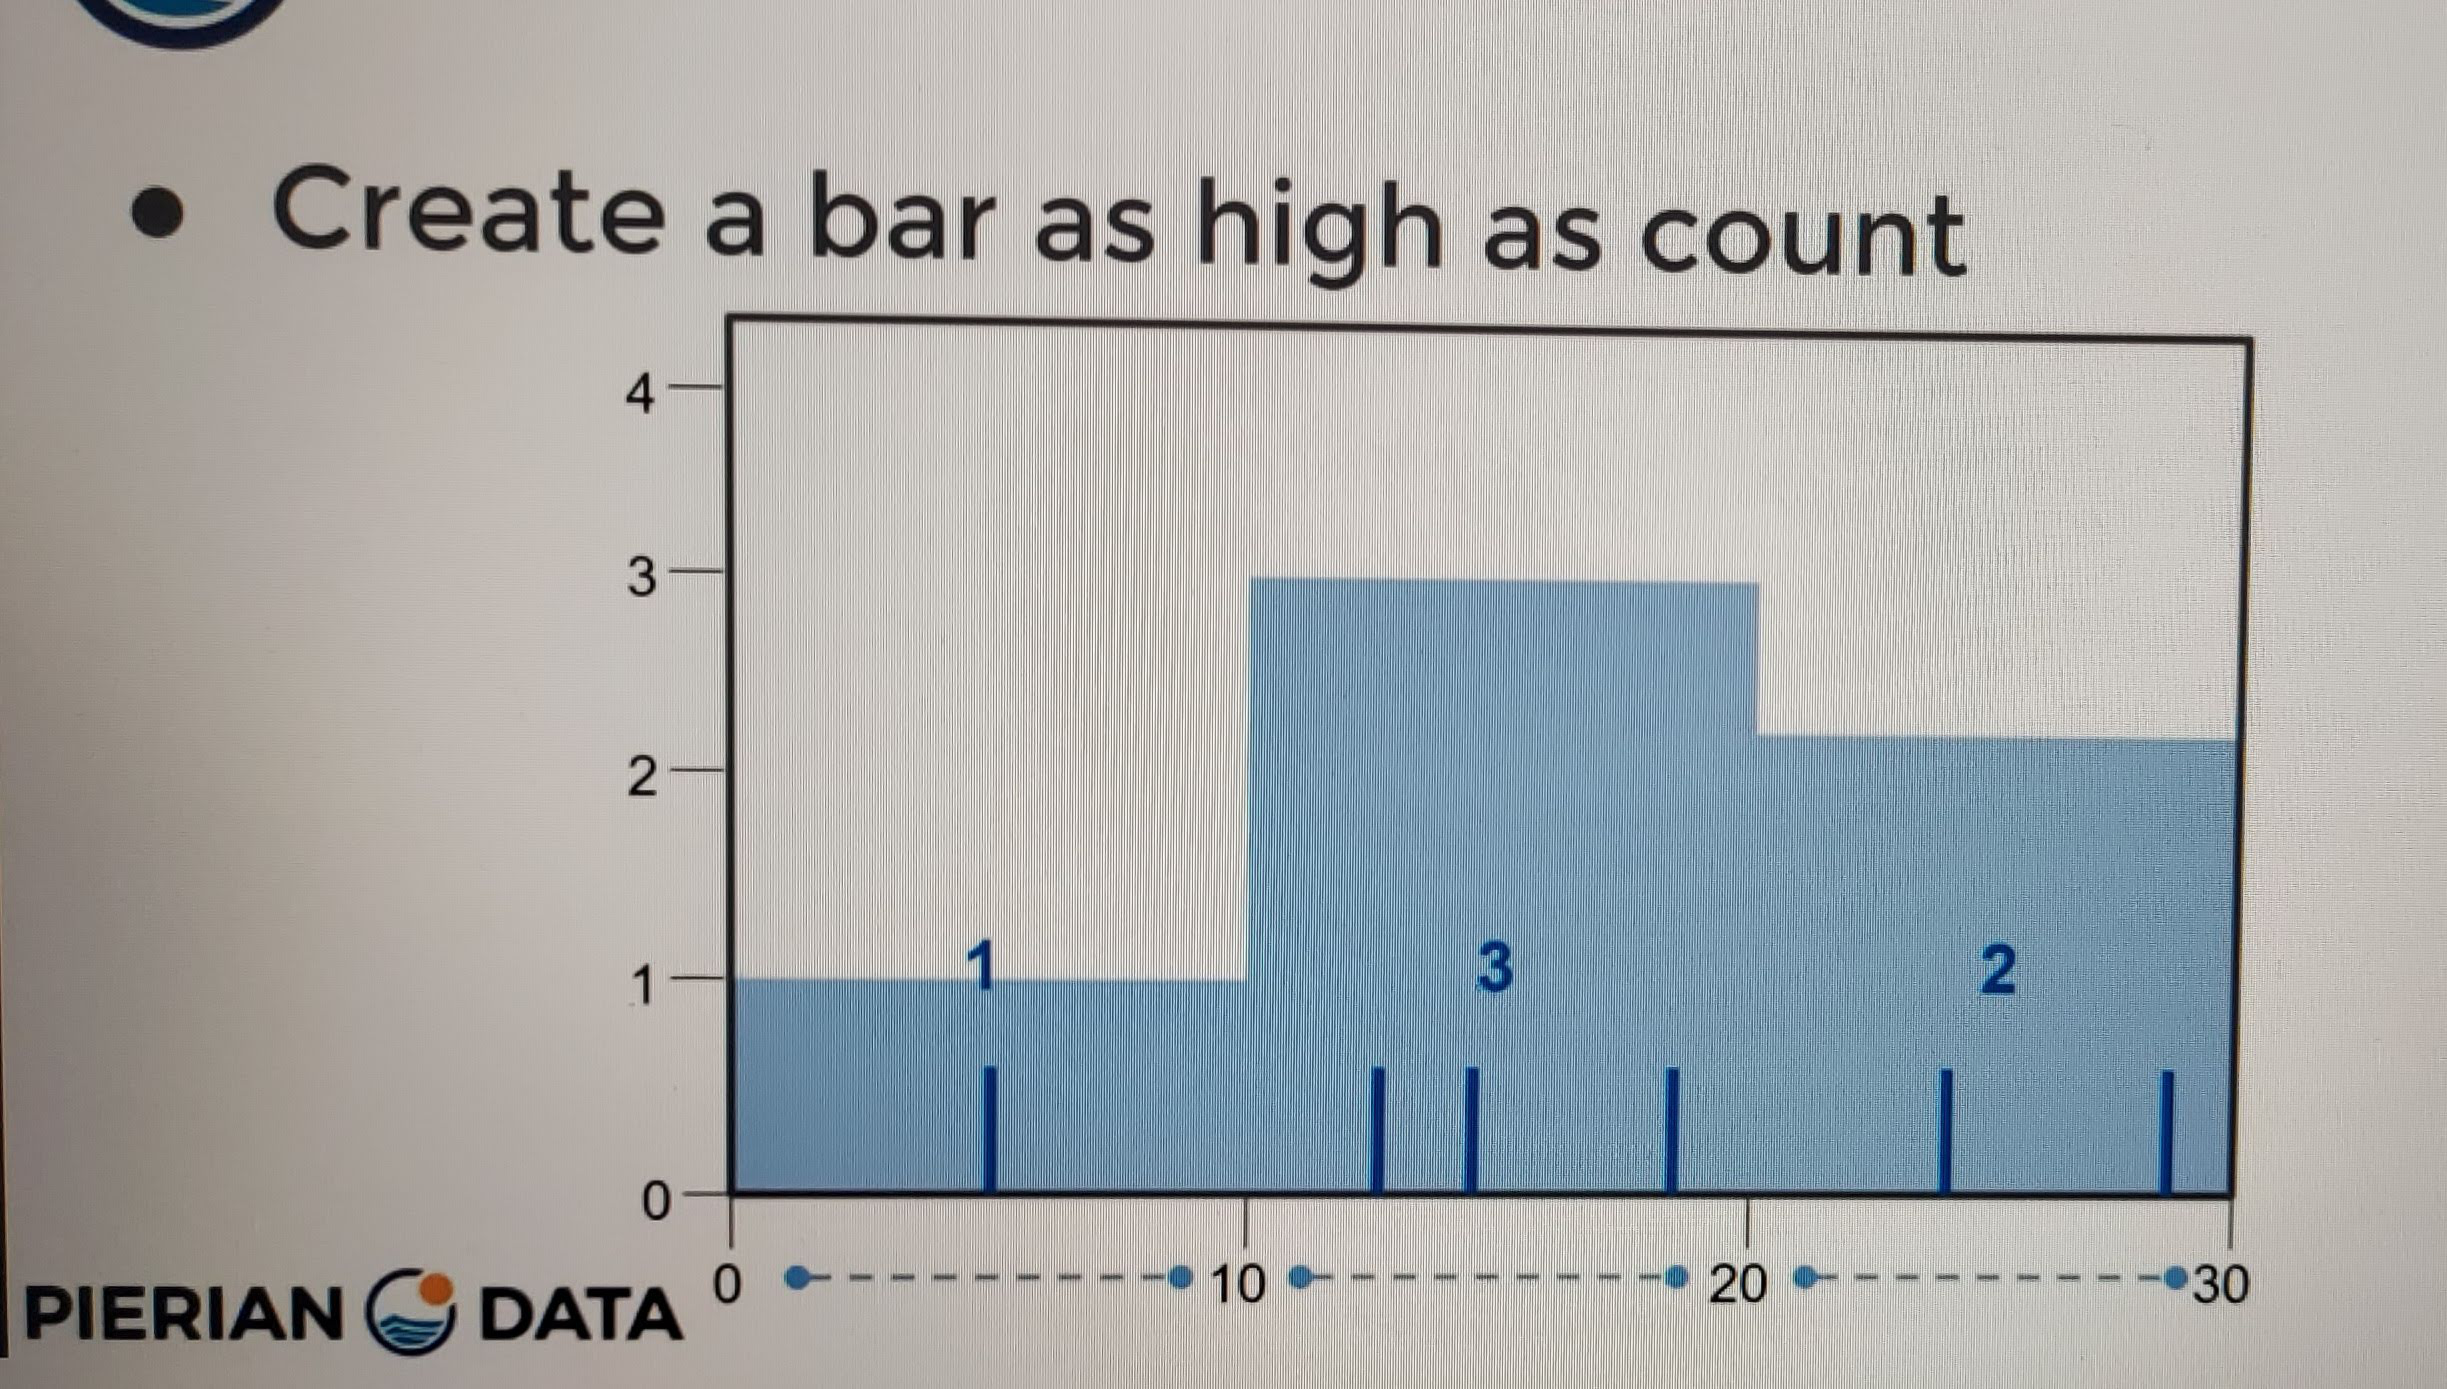

In [2]:
Image.open('20220504_182948.jpg')

# ticks in the below part represent a rug plot

Choose a number of 'bins'. And these bins should be the same size.

So essentially what we're going to do is for each of these binwidths, we count how many ticks there are and then we create a bar that's as high as the count.

What we can do is we can also normalize the y axis as a percent (a percentage of all the points).



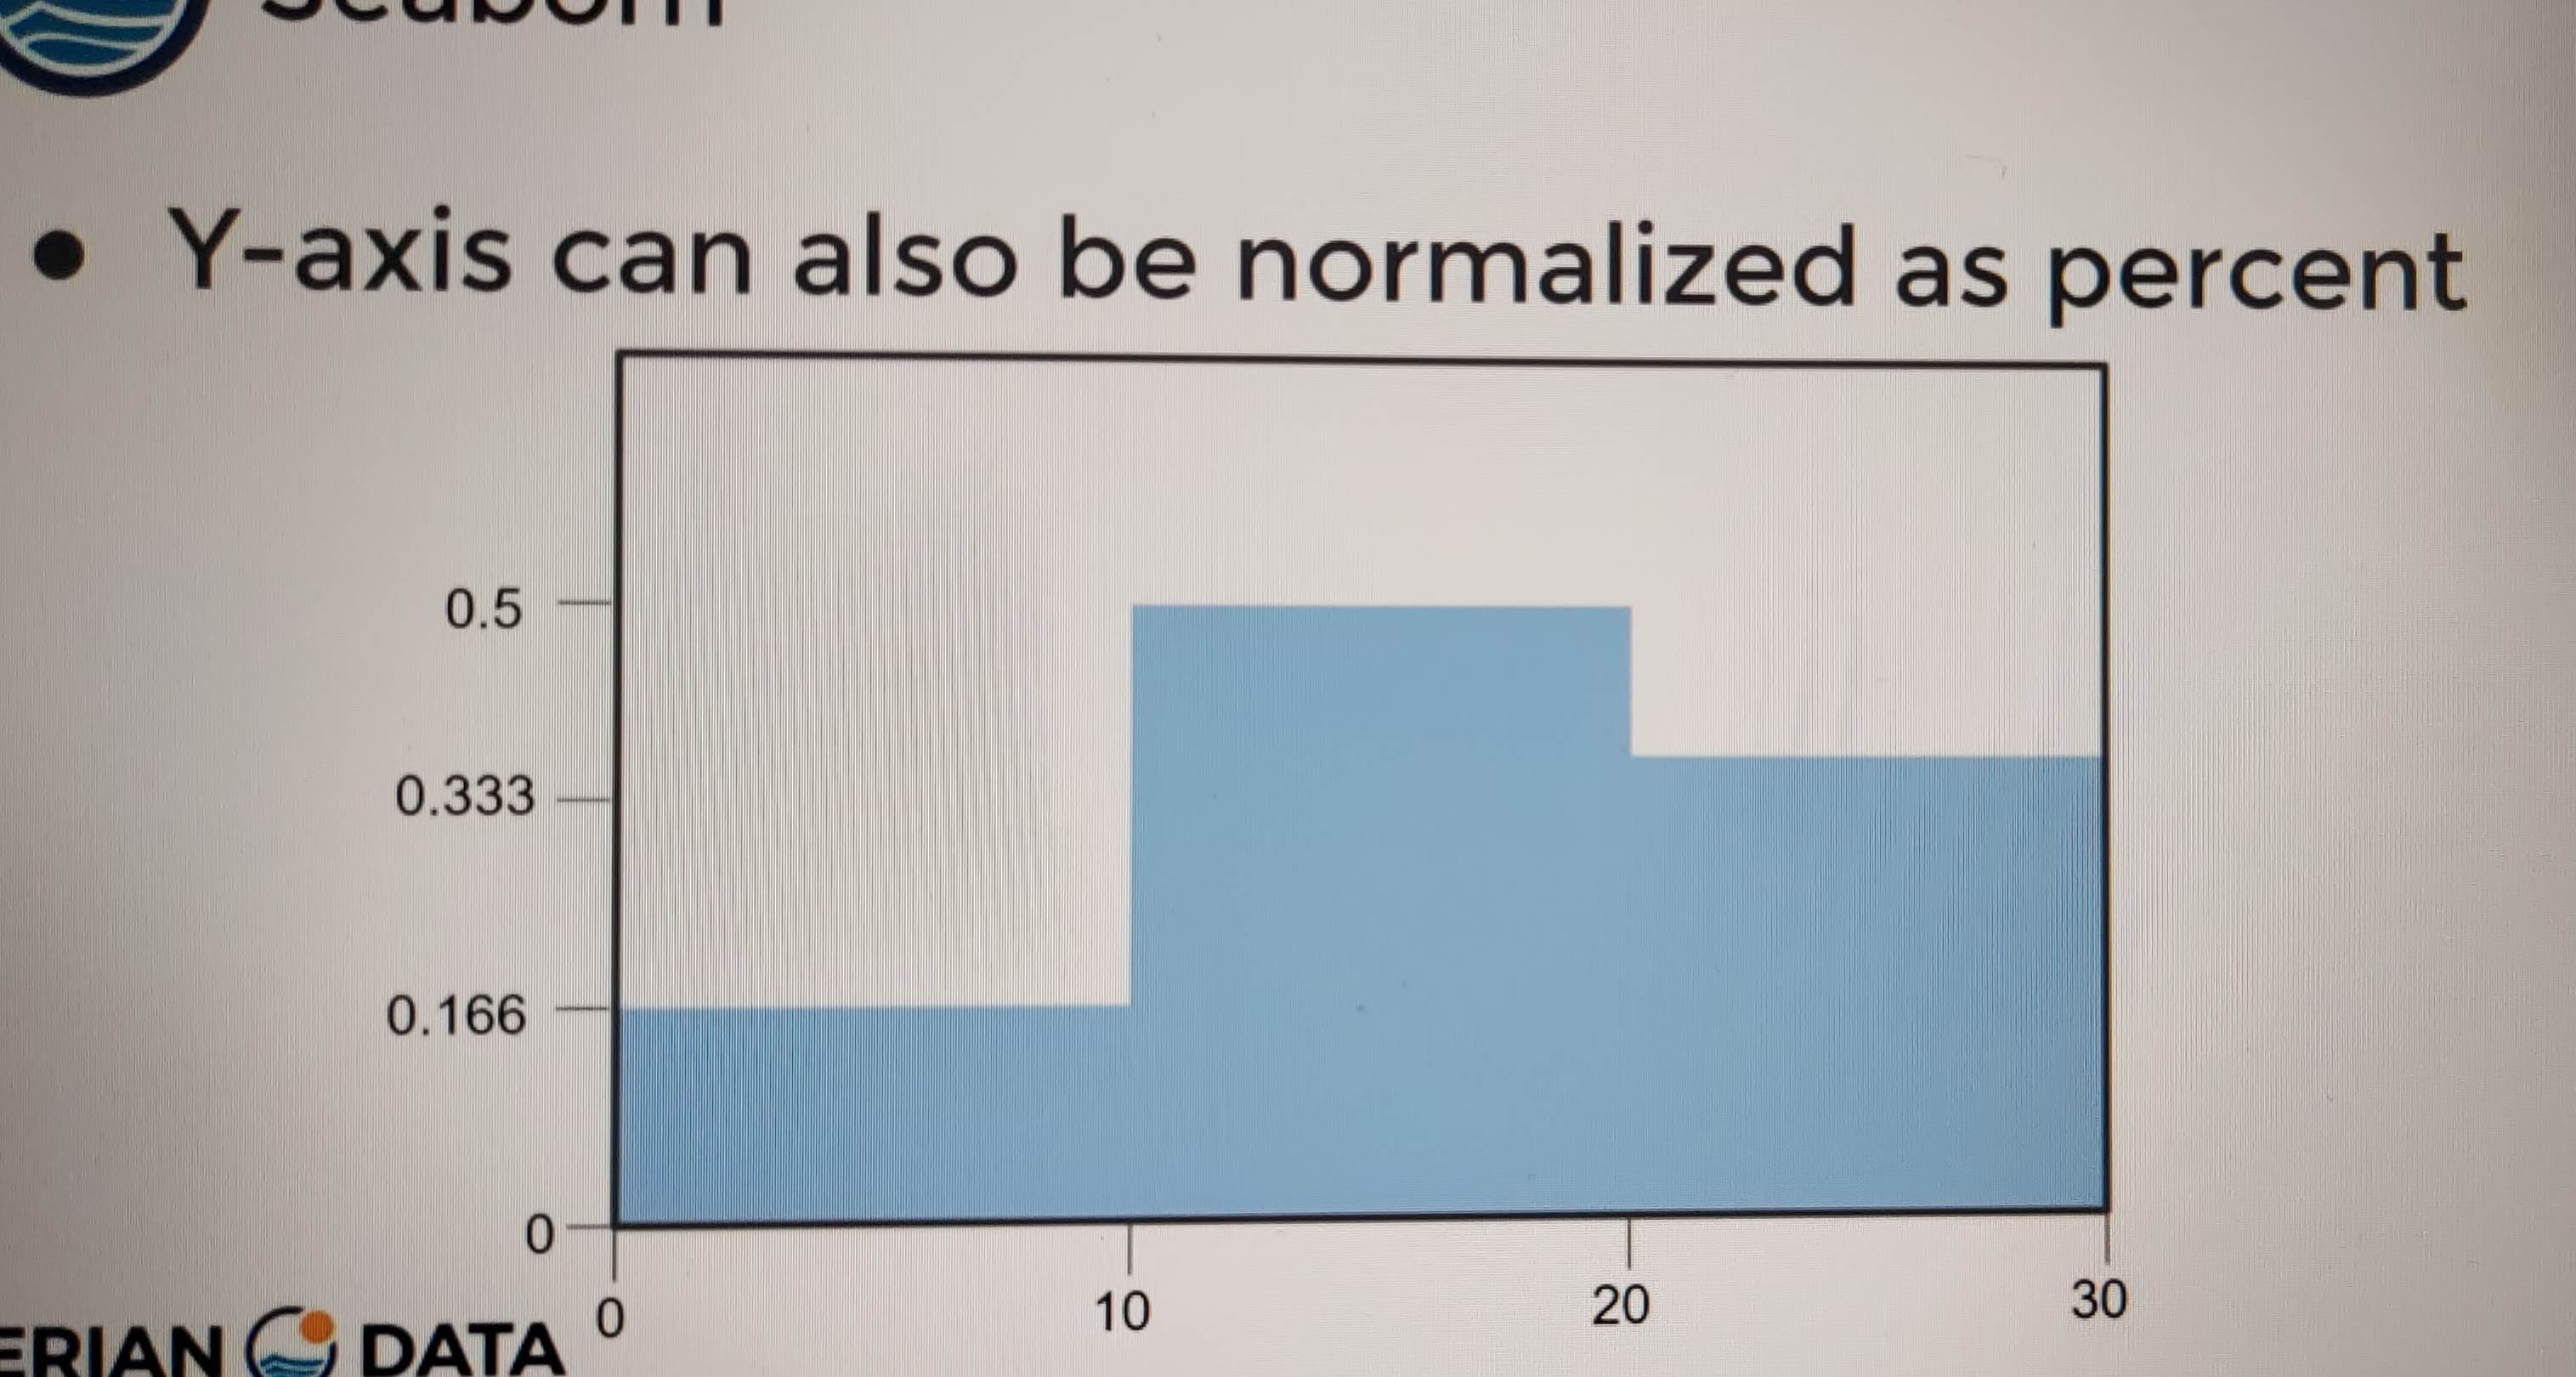

In [3]:
Image.open('20220504_184457.jpg')

0.5 _ meaning half of all the points in the dataset fall between 10 and 20.

___

<a id='kde'></a>

__`KDE`__

- __KDE__ _ which shows you what a continuous probability function would look like for that particular dataset.
- It is a method of __estimating__ a probability density function of a random variable.
- In simpler terms, it is a way of estimating a continuous probability curve for a finite data sample.

- The KDE plot maps an estimate of a probability *density* function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Theoretically, we don't actually know every single point for every single salary, as far as what's the probability of someone in a larger sample having a salary, for instance, between sixty thousand sixty five thousand because we're dealing with a finite data set. So the probability curve here with the KDE, that blue line, it allows us to kind of behave as if we are dealing with a continuous probability curve when in reality we're really just dealing with discrete measurements of a finite data sample.

<u>Now let's see how it is constructed.</u>
<br>So what we're going to do is just take a sample of some sort of continuous feature. And this feature can be negative or positive or both. See the rug plot for that feature. 

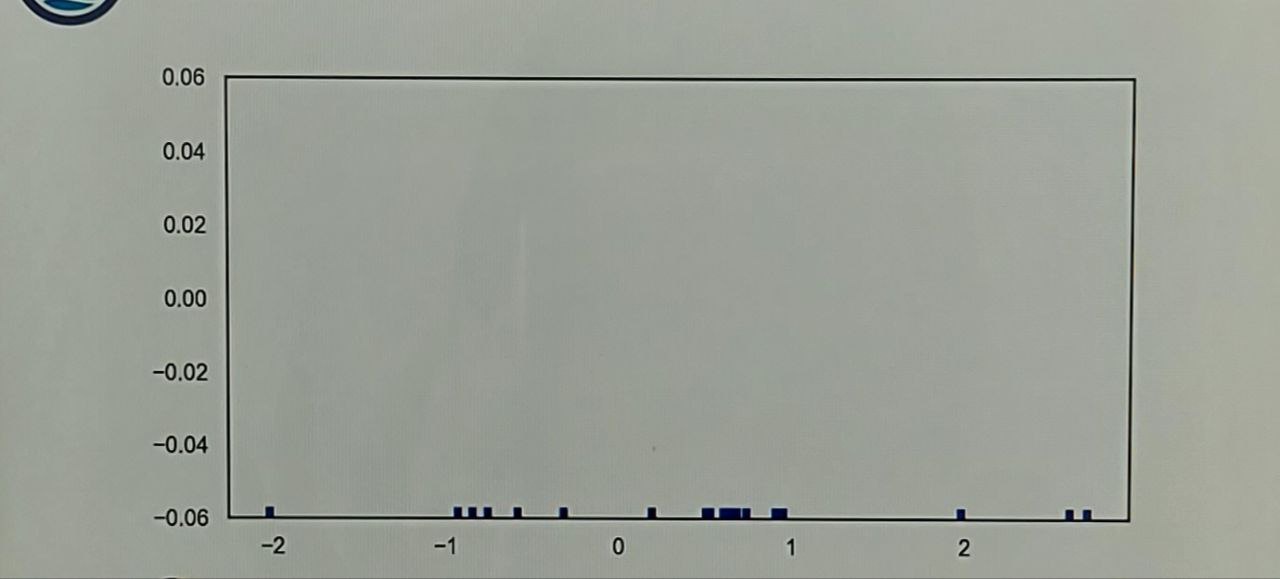

In [4]:
Image.open('photo_2022-05-05_03-19-34.jpg')

Then what we're going to do here is just stack a little normal (Gaussian) distribution on top of each of these rug tick points.

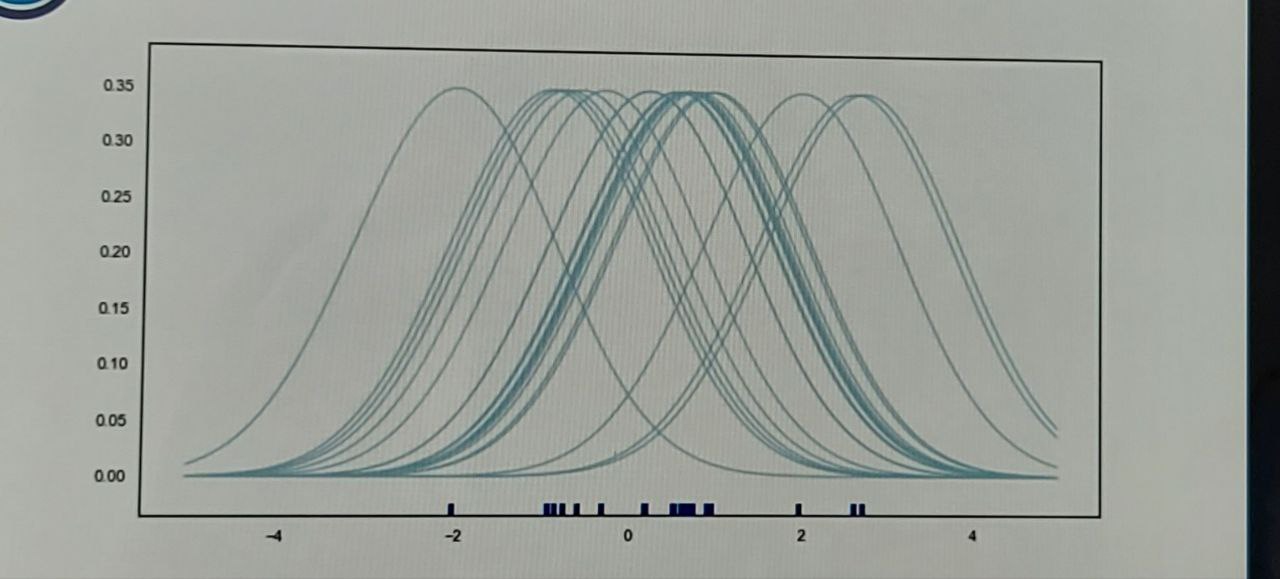

In [5]:
Image.open('photo_2022-05-05_04-24-45.jpg')

So essentially every tick point now has a Gaussian curve, which is centered at that tick.

And then in order to build up an overall curve, we can just add these all up.

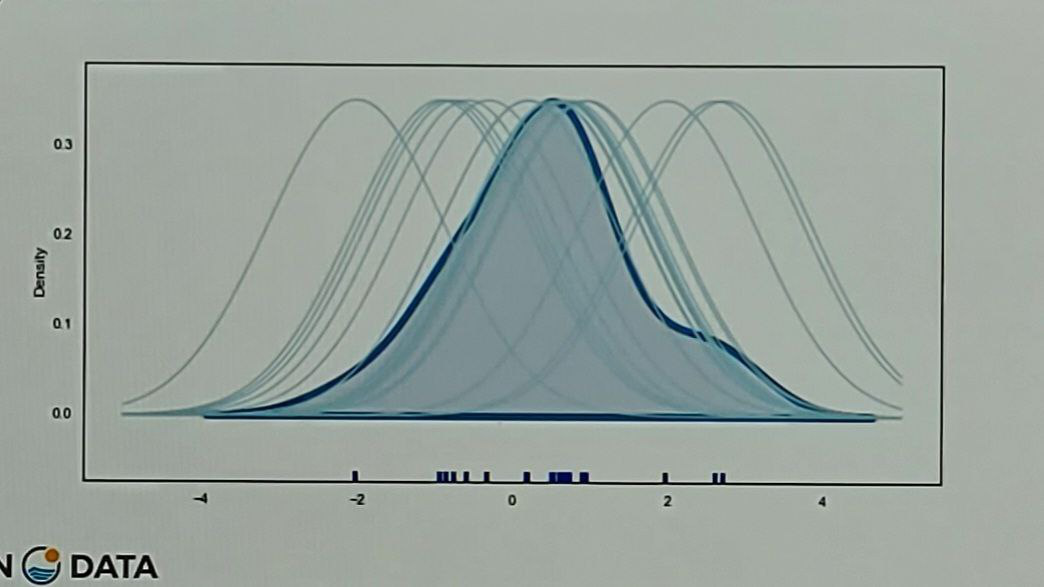

In [6]:
Image.open('photo_2022-05-05_04-31-23.jpg')

Essentially what it's telling you is the probability as if it was a continuous distribution.

Someone looking at this would say, oh, most of the points are probably between negative two and two, which would be true.

You should also notice that because of the way the kernel density estimation plot is constructed, there is the ability to go beyond as far as the curve is concerned - the original dataset. 
<br>From the rug plot you can see that our lowest value was negative two, but because we centered that Gaussian distribution around negative two, it's going to leak pass negative two both on the left hand side and the right hand side. So that means when you're summing them all up to create the overall curve, you're actually going to get a probability for values less than negative two, which may or may not be true, depending on what dataset you're actually working with. So it's not uncommon to actually do a hard cutoff at a certain spot in the kernel density estimation. For example, when we're dealing with salaries and we were to draw KDE, we're going to draw a hard line at zero because no one has a negative salary.

So other things you should know is that you can actually change the kernel, it doesn't have to be the Gaussian kernel and you can also change the bandwidth.

___

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv('dm_office_sales.csv')

In [9]:
df.head()

# each row represents one employee

division  level of education  training level  work experience  \
0         printers        some college               2                6   
1         printers  associate's degree               2               10   
2      peripherals         high school               0                9   
3  office supplies  associate's degree               2                5   
4  office supplies         high school               1                5   

   salary   sales  
0   91684  372302  
1  119679  495660  
2   82045  320453  
3   92949  377148  
4   71280  312802

___

<a id='snsrugplot'></a>
## rugplot 

__The distribution of people's salaries__

__`sns.rugplot(x='', data=)`__

<AxesSubplot:xlabel='salary'>

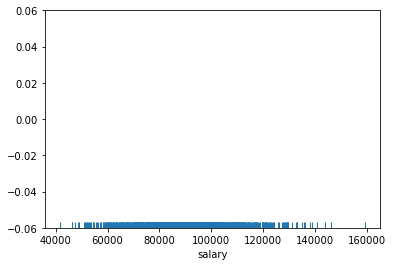

In [10]:
sns.rugplot(x='salary', data=df)

# a single tick for every single salary

And if these ticks are too small, you can always just edit the height.

__`sns.rugplot(x='', data=, height=)`__

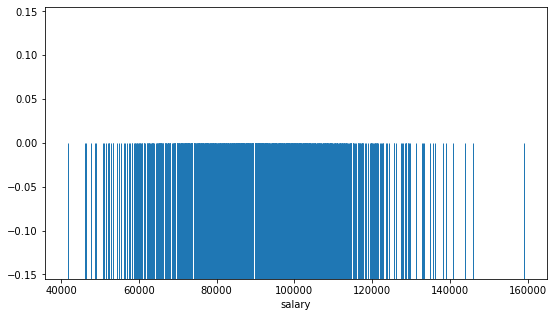

In [11]:
plt.figure(figsize=(9, 5))
sns.rugplot(x='salary', data=df, height=0.5);

# take up 50 percent of the Y axis on the height.

___

<a id='snsdisplot'></a>
## displot and histplot  

___

__!!! sns.distplot() is deprecated. Do NOT use this.__

___

__`sns.displot(data=, x='')`__

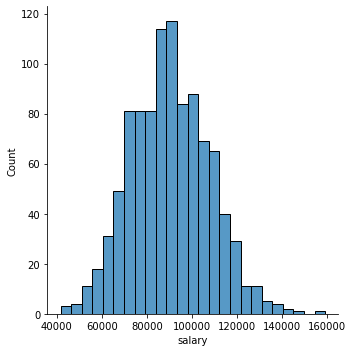

In [12]:
sns.displot(data=df, x='salary')

Things you can edit about the histogram are things like the bin size or the number of bins.

__`sns.displot(data=, x='', bins=)`__

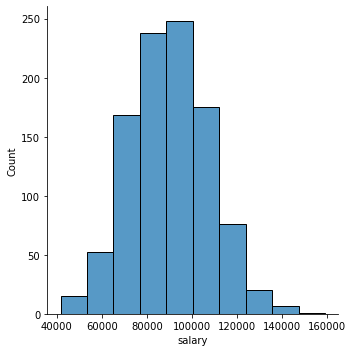

In [13]:
sns.displot(data=df, x='salary', bins=10)

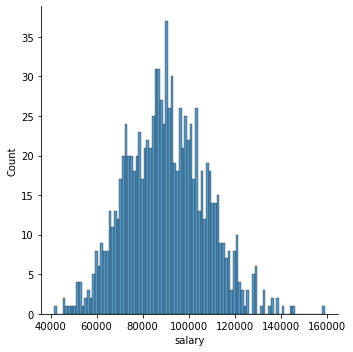

In [14]:
sns.displot(data=df, x='salary', bins=100)

# it's basically breaking up the x axis into one hundred even bins.

___

<a id='styles'></a>
You can also add in grids and styles for histogram. So sometimes with the default white background style, it's a little hard to match up the height of a histogram column with the y axis.

__`sns.set(style='darkgrid')`__

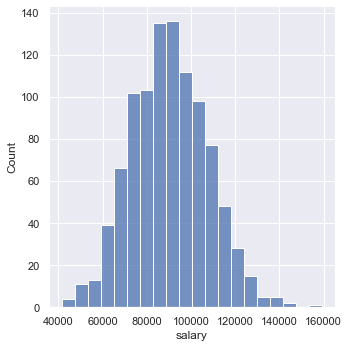

In [15]:
sns.set(style='darkgrid')
sns.displot(data=df, x='salary', bins=20)

__`sns.set(style='whitegrid')`__

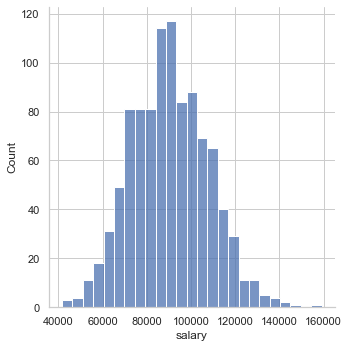

In [16]:
sns.set(style='whitegrid')
sns.displot(data=df, x='salary')

__`sns.set(style='white')`__

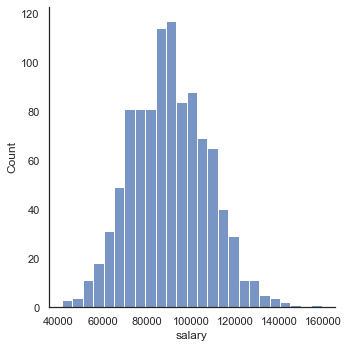

In [17]:
sns.set(style='white')
sns.displot(data=df, x='salary')

__`sns.set(style='dark')`__

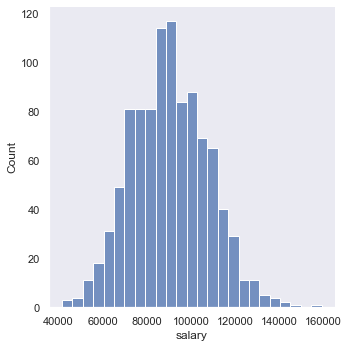

In [18]:
sns.set(style='dark')
sns.displot(data=df, x='salary')

__`sns.set(style='ticks')`__

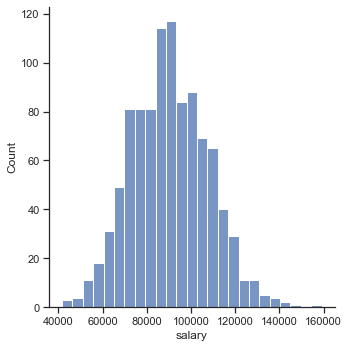

In [19]:
sns.set(style='ticks')
sns.displot(data=df, x='salary')

# Which essentially just makes ticks along the y axis and x axis.

___

**kwg - actually refers to the keyword arguments that are available for us inside of matplotlib.

__`sns.displot(data=, x='', bins=, color='', edgecolor='', linewidth=, ls='')`__

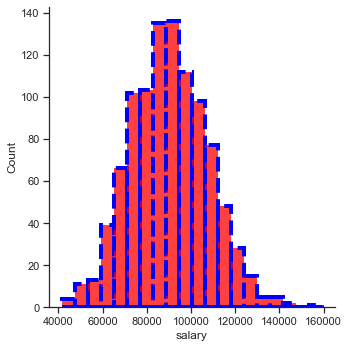

In [20]:
sns.displot(data=df, x='salary', bins=20, color='red', edgecolor='blue', linewidth=4, ls='--')

___

__`sns.displot(data=, x='', kde=True)`__

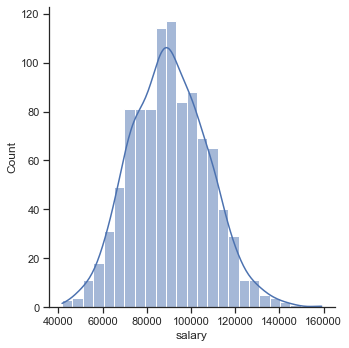

In [21]:
sns.displot(data=df, x='salary', kde=True)

__`sns.displot(data=, x='', rug=True)`__

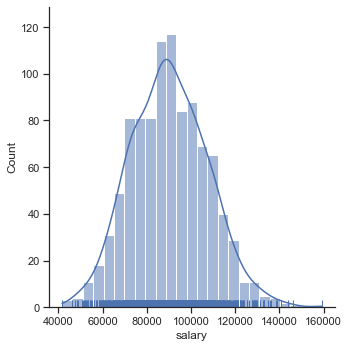

In [22]:
sns.displot(data=df, x='salary', kde=True, rug=True)

# it will show you all three of them

___

<a id='snshistplot'></a>

__`sns.histplot(data=, x='')`__

<AxesSubplot:xlabel='salary', ylabel='Count'>

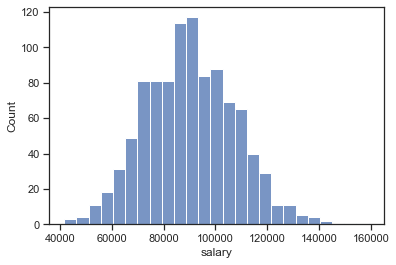

In [23]:
sns.histplot(data=df, x='salary')

___

<a id='snskdeplot'></a>
## kdeplot

__`sns.kdeplot(data=, x='')`__

<AxesSubplot:xlabel='salary', ylabel='Density'>

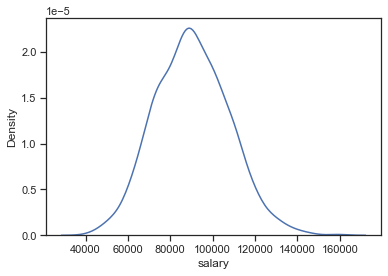

In [24]:
sns.kdeplot(data=df, x='salary')

___

In [25]:
np.random.seed(42)
sample_ages = np.random.randint(0, 100, 200)
sample_ages

# randint should be uniform, each age has the same chance of being chosen
# note: in reality ages are almost never uniformally distributed, but this is just an example

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26])

In [26]:
sample_ages = pd.DataFrame(sample_ages, columns=['age'])

In [27]:
sample_ages

age
0     51
1     92
2     14
3     71
4     60
..   ...
195   76
196    2
197   69
198   71
199   26

[200 rows x 1 columns]

__`sns.rugplot(data=, x='', height=, linewidth=)`__

<AxesSubplot:xlabel='age'>

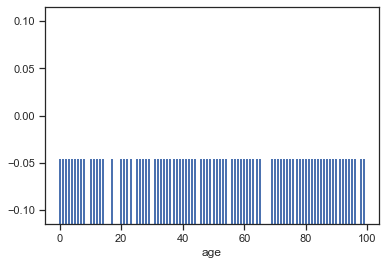

In [28]:
sns.rugplot(data=sample_ages, x='age', height=0.3, linewidth=2)

I have a pretty uniform distribution, looks like I'm missing some a little below 20 and a little above 60. You have the same probability for all ages, but because it's all random, there's going to be a little bit of randomness to this.

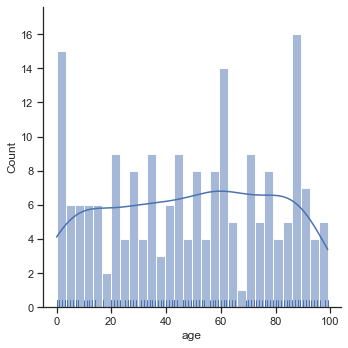

In [29]:
sns.displot(data=sample_ages, x='age', rug=True, bins=30, kde=True)

What's interesting is that the kde here is immediately cut off below zero and above 100 because there are no values there, which realistically is actually what we want. But in some situations, maybe we'll have values below your actual limits.

<AxesSubplot:xlabel='age', ylabel='Density'>

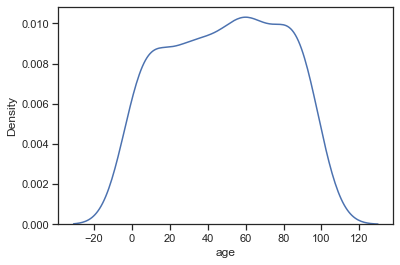

In [30]:
sns.kdeplot(data=sample_ages, x='age')

You get here some probability outside your existing range.

So if you do want to cut it off, then use a __clip parameter__.

__`sns.kdeplot(data=, x='', clip=[])`__

<AxesSubplot:xlabel='age', ylabel='Density'>

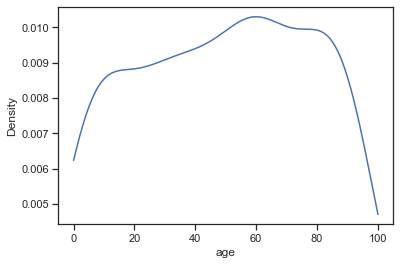

In [31]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100])

So what the density is really representing, it is the probability curve for picking someone at this particular age.
<br>And if you want, you can then start taking the area underneath it to get the probability of picking someone between, for instance, 20 and 40 years old.

___

__`sns.kdeplot(data=, x='', bw_adjust=)`__

You can actually edit the bandwidth, you can adjust it.

<AxesSubplot:xlabel='age', ylabel='Density'>

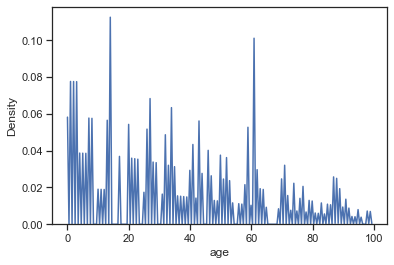

In [32]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100], bw_adjust=0.01)

If you make bw_adjust parameter a very small value, for example 0.01, what's going to happen is with very narrow bandwidth, you're having really skinny Gaussian distribution stacked on top of each of these rug points. So it's going to pick up a lot of the variance here.

<AxesSubplot:xlabel='age', ylabel='Density'>

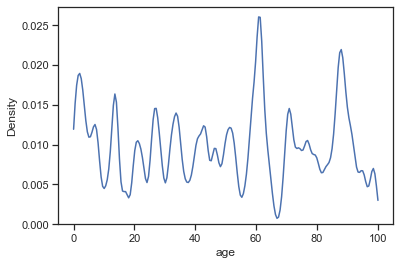

In [33]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100], bw_adjust=0.1)

<AxesSubplot:xlabel='age', ylabel='Density'>

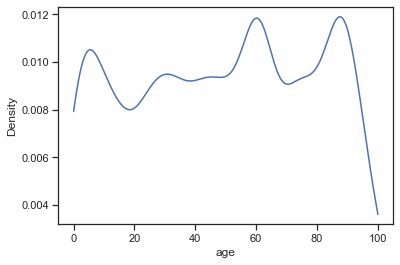

In [34]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100], bw_adjust=0.5)

As you begin to make it wider, you start to pick up less and less of the noise.

___


__`sns.kdeplot(data=, x='', shade=True)`__

<AxesSubplot:xlabel='age', ylabel='Density'>

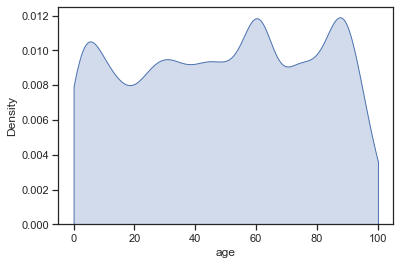

In [35]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100], bw_adjust=.5, shade=True)

# it will actually fill it in for you